# **1. General** **Overview**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#!pip install textstat  
import textstat

nltk.download('stopwords')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tharanidissanayake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Load dataset 
df = pd.read_csv("/Users/tharanidissanayake/Documents/TripAdvisor-Review-CW/data/dataset_raw.csv")

### Row count

In [13]:
print("Total number of reviews:", len(df))

Total number of reviews: 11829


### Unique counts

In [14]:
unique_hotels = df['placeName'].nunique()
unique_users = df['username'].nunique()
print("Unique hotels:", unique_hotels)
print("Unique users:", unique_users)

Unique hotels: 240
Unique users: 11198


### Review text length statistics

In [15]:
# Calculate average number of reviews per hotel
reviews_per_hotel = df.groupby('placeName')['review_text'].count()
print("Average reviews per hotel:", reviews_per_hotel.mean())

Average reviews per hotel: 49.28333333333333


### Review text length statistics

In [16]:
df['review_length'] = df['review_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
print(df['review_length'].describe())

count    11829.000000
mean        91.961451
std         79.909159
min          0.000000
25%         47.000000
50%         64.000000
75%        107.000000
max       1955.000000
Name: review_length, dtype: float64


# **2. Text** **Length** **Analysis**

### Plot a Histogram

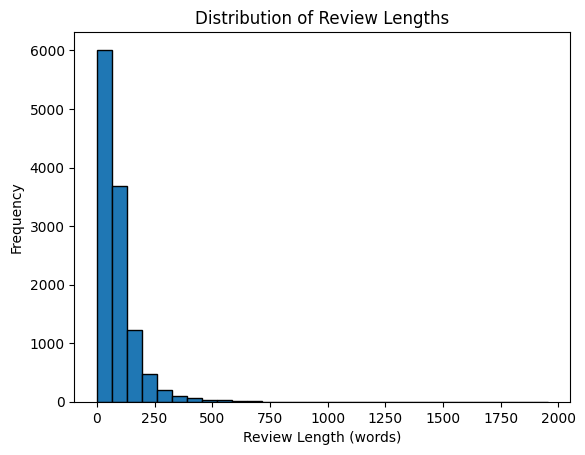

In [17]:
plt.hist(df['review_length'], bins=30, edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.show()

### Boxplot

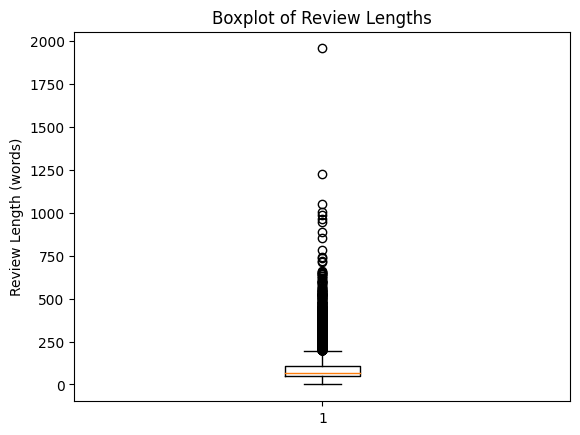

In [18]:
plt.boxplot(df['review_length'])
plt.title("Boxplot of Review Lengths")
plt.ylabel("Review Length (words)")
plt.show()

### Cumulative distribution

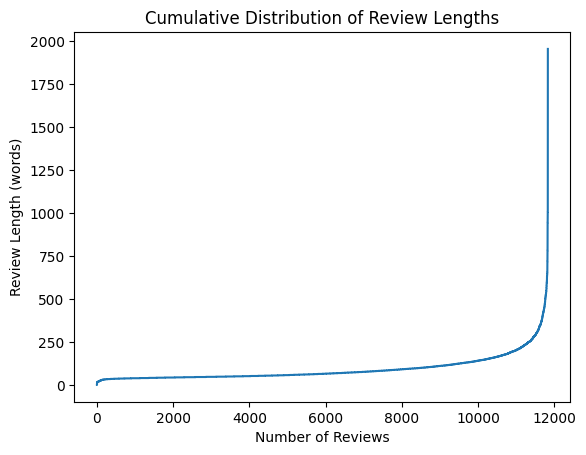

In [19]:
df['review_length'].sort_values().reset_index(drop=True).plot(drawstyle="steps-post")
plt.title("Cumulative Distribution of Review Lengths")
plt.xlabel("Number of Reviews")
plt.ylabel("Review Length (words)")
plt.show()

# **3. Word** **and** **Token** **Analysis**

### Most common words

In [20]:
all_words = ' '.join(df['review_text'].dropna()).split()
word_freq = Counter(all_words).most_common(20)
print("Most Common Words:", word_freq)

Most Common Words: [('the', 51947), ('and', 46207), ('a', 26901), ('to', 26395), ('was', 20687), ('The', 15765), ('is', 15588), ('of', 15212), ('in', 14447), ('for', 12879), ('with', 11077), ('we', 10220), ('very', 10212), ('were', 8503), ('I', 8338), ('We', 7752), ('at', 6982), ('our', 6923), ('are', 6825), ('hotel', 6686)]


### Top N-grams

In [21]:
bigrams = ngrams(all_words, 2)
bigram_freq = Counter(bigrams).most_common(20)
print("Top Bigrams:", bigram_freq)

Top Bigrams: [(('in', 'the'), 4597), (('and', 'the'), 4568), (('of', 'the'), 4505), (('to', 'the'), 3418), (('from', 'the'), 2400), (('on', 'the'), 2221), (('at', 'the'), 2199), (('with', 'a'), 2053), (('is', 'a'), 1991), (('had', 'a'), 1862), (('the', 'hotel'), 1862), (('was', 'very'), 1835), (('it', 'was'), 1714), (('for', 'a'), 1714), (('The', 'staff'), 1664), (('was', 'a'), 1655), (('for', 'the'), 1611), (('friendly', 'and'), 1583), (('the', 'staff'), 1540), (('we', 'were'), 1433)]


### Vocabulary Size and Unique Word Ratio

In [22]:
vocab_size = len(set(all_words))
unique_ratio = vocab_size / len(all_words)
print("Vocabulary Size:", vocab_size)
print("Unique Word Ratio:", unique_ratio)

Vocabulary Size: 52084
Unique Word Ratio: 0.04787959684210139


# **4. Sentiment** **and** **Thematic** **Analysis**

### Keyword-based Sentiment exploration

In [23]:
sentiment_words = ['good', 'bad', 'amazing', 'terrible']
sentiment_counts = {word: all_words.count(word) for word in sentiment_words}
print("Sentiment Word Counts:", sentiment_counts)

Sentiment Word Counts: {'good': 4142, 'bad': 274, 'amazing': 1706, 'terrible': 74}


### Sentiment Score Distribution

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tharanidissanayake/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


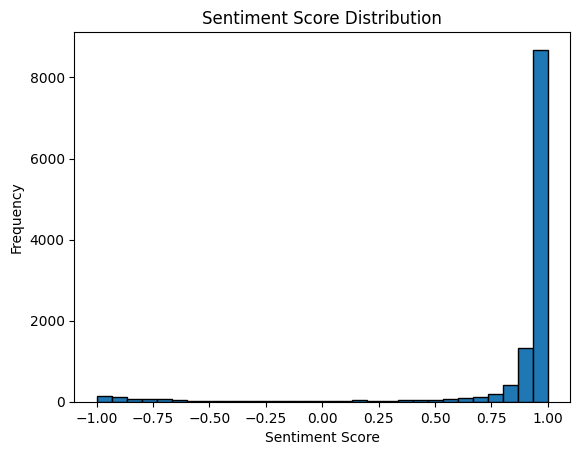

In [24]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'] if pd.notnull(x) else 0)

plt.hist(df['sentiment_score'], bins=30, edgecolor='black')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# **5. Temporal Analysis**

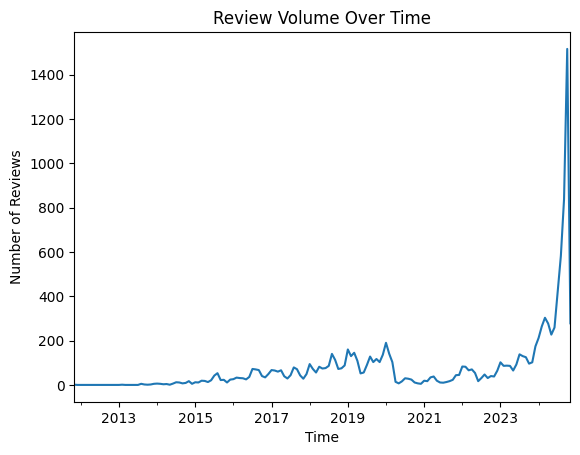

In [26]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df.set_index('publishedDate')['review_text'].resample('M').count().plot()
plt.title("Review Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Reviews")
plt.show()

# **6. Text Complexity and Readability**

In [27]:
df['readability_score'] = df['review_text'].apply(lambda x: textstat.flesch_reading_ease(x) if pd.notnull(x) else 0)
print("Readability Scores:", df['readability_score'].describe())

Readability Scores: count    11829.000000
mean        73.647448
std         13.719699
min       -139.990000
25%         67.280000
50%         75.710000
75%         82.440000
max        117.360000
Name: readability_score, dtype: float64


# **7. Visualization Techniques**

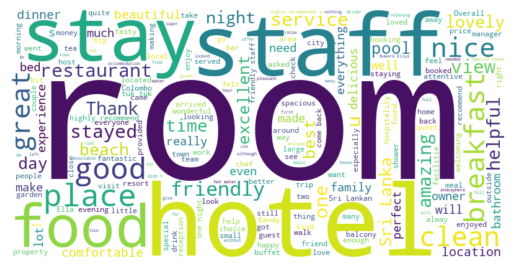

In [29]:
#Visualize the most common words in the dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review_text'].fillna('')))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

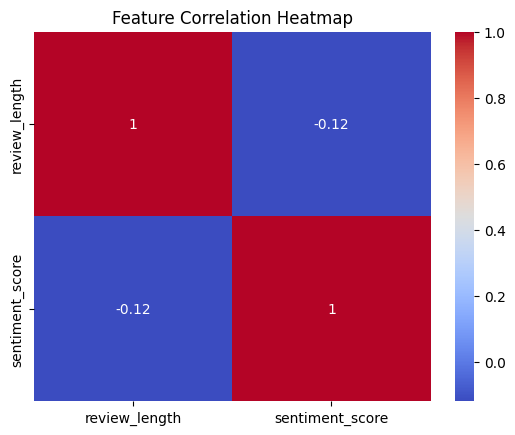

In [31]:
#Show correlations between numerical features
required_columns = ['review_length', 'sentiment_score']
existing_columns = [col for col in required_columns if col in df.columns]

# Plot heatmap for existing numerical columns
sns.heatmap(df[existing_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()